In [2]:
from ProjectData import ProjectData
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
# read in project data and build matrices from data
pr = ProjectData('../train.json','../test.json')
pr.add_handcrafted_features()
pr.build_matrices()

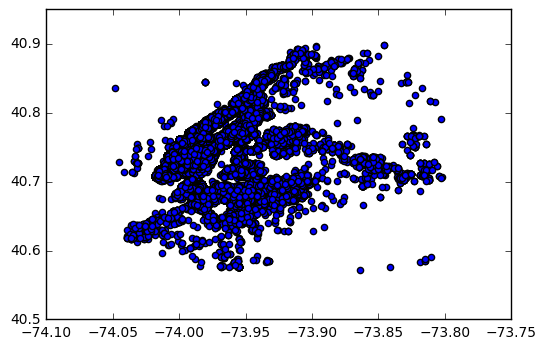

In [4]:
# partition the data into (NY) city and other
in_city =(  (pr.train_data['latitude']  > 40.55) 
          & (pr.train_data['latitude']  < 40.9)
          & (pr.train_data['longitude'] > -74.05) 
          & (pr.train_data['longitude'] < - 73.8))
city_data  = pr.train_data[['latitude','longitude']].loc[in_city]

# plot location of apartment listings in NY city
plt.scatter(city_data['longitude'], city_data['latitude'],c='b')
plt.show()

## Cluster the apartment listings into neighborhoods and plot them

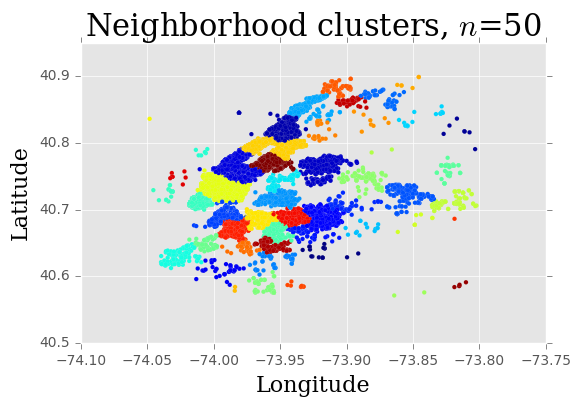

In [11]:
city_data = pr.train_data[in_city]

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }


font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.style.use('ggplot')
plt.xlabel('Longitude',fontdict=font2)
plt.ylabel('Latitude' ,fontdict=font2)
plt.title('Neighborhood clusters, $n$=50',fontdict=font)
plt.scatter(city_data['longitude'], 
            city_data['latitude'],
            c=city_data['neighborhood_cluster'],
            s=10, 
            linewidth=0.05)
plt.subplots_adjust(bottom=0.15)
plt.savefig('nbhds.eps')
plt.show()